# Load

In [1]:
devtools::load_all("~/public/SiyuanLuo/projects/clustering_metrics/ClusteringMetrics")

ℹ Loading ClusteringMetrics
Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



In [2]:
library(ggplot2)
library(tidyr)
library(cowplot)
library(dplyr)
library(grid)
library(ggtext)


Attaching package: ‘tidyr’


The following object is masked from ‘package:testthat’:

    matches



Attaching package: ‘dplyr’


The following object is masked from ‘package:testthat’:

    matches


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Data
Simulate Visium-like hexagonal grid data

In [3]:
# Define the grid dimensions
n_rows <- 16
n_cols <- 15  

simulate_array <- function(n_rows=10, n_cols=10){
  # Create coordinates for the hexagonal grid
  array <- data.frame(row = integer(), col = integer())
  
  for (r in 0:(n_rows - 1)) {
    if (r %% 2 == 0) {
      # Even row: column indices are even (0, 2, 4, ...)
      cols <- seq(0, n_cols*2 - 1, by = 2)
    } else {
      # Odd row: column indices are odd (1, 3, 5, ...)
      cols <- seq(1, n_cols*2 - 1, by = 2)
    }
    # Add to coordinates data frame
    array <- rbind(array, data.frame(row = r, col = cols))
  }
  return(array)
}

simulate_hexagonal_grid <- function(n_rows=10, n_cols=10){
  hex_radius <- 1
  hex_height <- 1.5 * hex_radius
  
  # Initialize vectors to store the x and y coordinates
  x_coords <- numeric(n_rows * n_cols)
  y_coords <- numeric(n_rows * n_cols)
  
  index <- 1
  
  for (row in 1:n_rows) {
    for (col in 1:n_cols) {
      # Calculate x and y for the center of the hexagon
      x <- col * sqrt(3) * hex_radius
      y <- row * hex_height
      
      # Shift alternate rows
      if (row %% 2 == 0) {
        x <- x + sqrt(3)/2
      }
      
      # Store the coordinates
      x_coords[index] <- x
      y_coords[index] <- y
      index <- index + 1
    }
  }
  
  # Return the coordinates as a data frame
  coords <- data.frame(x = x_coords, y = y_coords)
  coords <- cbind(coords, simulate_array(n_rows, n_cols))
  return(coords)
}


data <- simulate_hexagonal_grid(n_rows, n_cols)
data$label <- NA
for (i in 1:dim(data)[1]) {
  if(data[i, "col"] > data[i, "row"] + 6){
    data[i, "label"] <- 1
  }else{
  data[i, "label"] <- 2
  }
}
data$label <- factor(data$label)

Simulate some errors

In [4]:
s <- 3
st <- 1

data$p1 <- data$label
data[data$row == 4 & (data$col %in% c(12,14,16,18,20)), "p1"] <- factor(2, levels=c(1,2))
data[data$row == 5 & (data$col %in% c(13,15,17,19)), "p1"] <- factor(2, levels=c(1,2))
data[data$row == 6 & (data$col %in% c(14,16,18,20)), "p1"] <- factor(2, levels=c(1,2))
data[data$row == 7 & (data$col %in% c(15,17,19)), "p1"] <- factor(2, levels=c(1,2))

data$p2 <- data$label
for (i in unique(data$row)) {
  data[data$row==i & data$col==i+8, "p2"] <- factor(2, levels=c(1,2))
} 

p0 <- ggplot(data, aes(x, y, 
               color=label)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=label)) + 
  labs(x="",y="", title="C") 


p1 <- ggplot(data, aes(x, y, 
               color=label)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=p1)) + 
  labs(x="",y="", title="P1") 


p2 <- ggplot(data, aes(x, y, 
               color=label)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=p2)) + 
  labs(x="",y="", title="P2") 

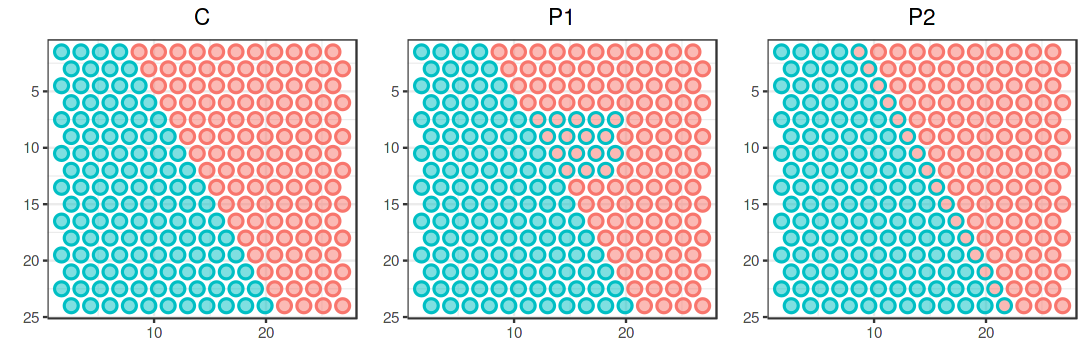

In [5]:
options(repr.plot.width=9, repr.plot.height=3)
# grDevices::cairo_pdf("Fig1.pdf", width=10, height=3)
ps1 <- plot_grid(p0 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)),
                 p1 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)), 
                p2 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)), 
                # p3 + theme(legend.position = "none"), 
                # p4 + theme(legend.position = "none"), 
                # labels = c("C", "P1", "P2"), 
                ncol = 3)
plot(ps1)
# dev.off()


In [6]:
data$p4 <- data$label
data[data$row == 3 & (data$col %in% c(11,13)), "p4"] <- factor(2, levels=c(1,2))
data[data$row == 4 & (data$col %in% c(12,14,16)), "p4"] <- factor(2, levels=c(1,2))
data[data$row == 5 & (data$col %in% c(13,15,17)), "p4"] <- factor(2, levels=c(1,2))
data[data$row == 6 & (data$col %in% c(14,16,18)), "p4"] <- factor(2, levels=c(1,2))
data[data$row == 7 & (data$col %in% c(15,17,19)), "p4"] <- factor(2, levels=c(1,2))
data[data$row == 8 & (data$col %in% c(16,18)), "p4"] <- factor(2, levels=c(1,2))

data$p3 <- data$label
data[data$row == 3 & (data$col %in% c(21,23)), "p3"] <- factor(2, levels=c(1,2))

data[data$row == 4 & (data$col %in% c(12,14)), "p3"] <- factor(2, levels=c(1,2))
data[data$row == 5 & (data$col %in% c(13,15)), "p3"] <- factor(2, levels=c(1,2))
data[data$row == 6 & (data$col %in% c(14)), "p3"] <- factor(2, levels=c(1,2))

data[data$row == 5 & (data$col %in% c(21,23)), "p3"] <- factor(2, levels=c(1,2))
data[data$row == 6 & (data$col %in% c(22)), "p3"] <- factor(2, levels=c(1,2))

data[data$row == 9 & (data$col %in% c(25)), "p3"] <- factor(2, levels=c(1,2))

data[data$row == 12 & (data$col %in% c(20,26)), "p3"] <- factor(2, levels=c(1,2))

data[data$row == 10 & (data$col %in% c(18,20)), "p3"] <- factor(2, levels=c(1,2))
data[data$row == 11 & (data$col %in% c(19)), "p3"] <- factor(2, levels=c(1,2))

p3 <- ggplot(data, aes(x, y, 
               color=label)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=p3)) + 
  labs(x="",y="", title="P3") 
p4 <- ggplot(data, aes(x, y, 
               color=label)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=p4)) + 
  labs(x="",y="", title="P4") 

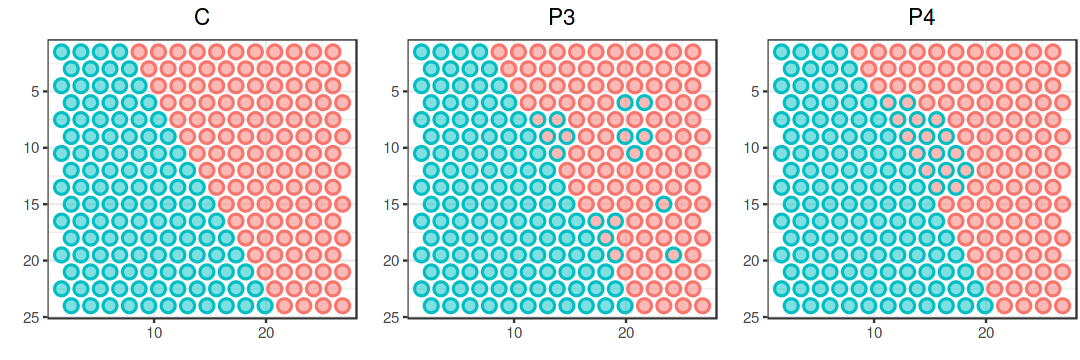

In [7]:
options(repr.plot.width=9, repr.plot.height=3)
# grDevices::cairo_pdf("Fig1.pdf", width=10, height=3)
ps2 <- plot_grid(p0 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)),
                 p3 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)), 
                 p4 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)), 
                # labels = c("C", "P3", "P4"), 
                ncol = 3)
plot(ps2)
# dev.off() 


# Global metrics

## P1, P2

In [8]:
head(data)

,x,y,row,col,label,p1,p2,p4,p3
,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1.732051,1.5,0,0,2,2,2,2,2
2,3.464102,1.5,0,2,2,2,2,2,2
3,5.196152,1.5,0,4,2,2,2,2,2
4,6.928203,1.5,0,6,2,2,2,2,2
5,8.660254,1.5,0,8,1,1,2,1,1
6,10.392305,1.5,0,10,1,1,1,1,1


In [9]:
k <- 6
pred <- c("p1","p2","p3","p4")
pred_name <- c("P1","P2","P3","P4")
label <- data$label
location <- data[, c('x','y')]
internal <-as.data.frame(lapply(setNames(pred, pred_name), function(x){getSpatialGlobalInternalMetrics(data[[x]], location, k=k, metrics=c("PAS", "ELSA", "CHAOS","MPC", "PC", "PE"))}))
externalSpatial <- as.data.frame(lapply(setNames(pred, pred_name), function(x){getSpatialGlobalExternalMetrics(label, data[[x]], location, k=k, 
                                                                                                                                                metrics=c("SpatialRI","SpatialARI","SpatialWH","SpatialAWH", 
                                                                                                                                                "SpatialWC","SpatialAWC","SpatialAccuracy","setMatchingAccuracy"))}))
externalNormal <- as.data.frame(lapply(setNames(pred, pred_name), function(x){getPartitionMetrics(label, data[[x]], metrics=c("RI","WC","WH","ARI","AWC","AWH"))}))

Loading required package: fclust



Loading required package: elsa

Loading required package: sp

Loading required package: raster


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: spdep

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: sf

Registered S3 method overwritten by 'e1071':
  method       from  
  print.fclust fclust

Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE


Attaching package: ‘spdep’


The following objects are masked from ‘package:elsa’:

    geary, moran


Standard error of the mean NDC across permutations:0.00117

Standard error of the mean NDC across permutations:0.00167

Standard error of the mean NDC across permutations:0.000878

Standard error of the mean NDC across permutations:0.000998



In [10]:
internal

,P1,P2,P3,P4
,<dbl>,<dbl>,<dbl>,<dbl>
PAS,0.02500000,0.004166667,0.05833333,0.02916667
ELSA.Ea,0.09483870,0.071982720,0.13490544,0.08266814
ELSA.Ec,0.25441365,0.197254062,0.33804455,0.22408725
ELSA,0.07990288,0.061669496,0.10268401,0.06986983
CHAOS,0.13066575,0.130665751,0.13411937,0.13066575
MPC,0.85058503,0.890612245,0.78184524,0.86772789
PC,0.92529252,0.945306122,0.89092262,0.93386395
PE,0.11019994,0.080844892,0.16417718,0.09712150


In [11]:
externalSpatial

,P1,P2,P3,P4
,<dbl>,<dbl>,<dbl>,<dbl>
SpatialRI,0.8847440,0.8881032,0.8885376,0.8843614
SpatialARI,0.7582728,0.7684134,0.7644124,0.7596013
SpatialWH,0.8044816,0.8533981,0.8063517,0.8162416
SpatialAWH,0.6066496,0.7045953,0.6112798,0.6298941
SpatialWC,0.8249695,0.8701271,0.8468261,0.8344695
SpatialAWC,0.6380537,0.7331553,0.6761450,0.6586958
SpatialAccuracy,0.9388889,0.9567460,0.9416667,0.9416667
setMatchingAccuracy,0.9333333,0.9333333,0.9333333,0.9333333


In [12]:
externalNormal

,P1,P2,P3,P4
,<dbl>,<dbl>,<dbl>,<dbl>
RI,0.8750349,0.8750349,0.8750349,0.8750349
WC,0.8834734,0.8834734,0.8834734,0.8834734
WH,0.8679141,0.8679141,0.8679141,0.8679141
ARI,0.7500840,0.7500840,0.7500840,0.7500840
AWC,0.7637173,0.7637173,0.7637173,0.7637173
AWH,0.7369290,0.7369290,0.7369290,0.7369290


In [13]:
internal$metric <- factor(rownames(internal))

In [14]:
internal %>% 
pivot_longer(cols=c("P1","P2","P3","P4"), names_to = "prediction", values_to = "value")

metric,prediction,value
<fct>,<chr>,<dbl>
PAS,P1,0.025000000
PAS,P2,0.004166667
PAS,P3,0.058333333
PAS,P4,0.029166667
ELSA.Ea,P1,0.094838697
ELSA.Ea,P2,0.071982720
ELSA.Ea,P3,0.134905437
ELSA.Ea,P4,0.082668135
ELSA.Ec,P1,0.254413652


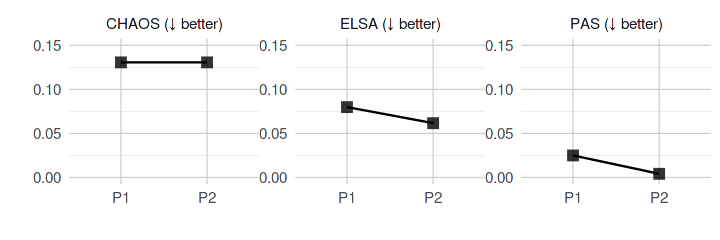

In [15]:
options(repr.plot.width=6, repr.plot.height=2)
pi <- internal %>% 
pivot_longer(cols=c("P1","P2","P3","P4"), names_to = "prediction", values_to = "value") %>%
filter(metric %in% c("PAS", "ELSA", "CHAOS")) %>%
filter(prediction %in% c('P1','P2')) %>%
ggplot(aes(x=prediction, y=value)) +
geom_point(size=3, alpha=0.8, shape=15) +
geom_line(aes(group=metric)) +
facet_wrap(~metric, scales = "free", nrow=1,
            labeller = as_labeller(c("PAS" = "PAS (↓ better)",
                                     "ELSA" = "ELSA (↓ better)",
                                     "CHAOS" = "CHAOS (↓ better)"))) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")
    ) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="", x="") +
ylim(0, 0.15)
pi

In [16]:
external <- rbind(externalSpatial, externalNormal)
external$metric <- rownames(external)
external$metric_class <- sub("Spatial", "", external$metric)
external$metric_type <- ifelse(grepl("Spatial",external$metric) , "Spatial", "NonSpatial")
external["SpatialAccuracy", "metric_class"] <- "Set Matching\nAccuracy"
external["setMatchingAccuracy", "metric_class"] <- "Set Matching\nAccuracy"

In [17]:
unique(external$metric_class)

[1] "RI"                     "ARI"                    "WH"                    
[4] "AWH"                    "WC"                     "AWC"                   
[7] "Set Matching\nAccuracy"

In [18]:
external$metric_class <- factor(external$metric_class, levels=c('RI','ARI','WH','AWH','WC','AWC','Set Matching\nAccuracy'))
external

,P1,P2,P3,P4,metric,metric_class,metric_type
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>
SpatialRI,0.8847440,0.8881032,0.8885376,0.8843614,SpatialRI,RI,Spatial
SpatialARI,0.7582728,0.7684134,0.7644124,0.7596013,SpatialARI,ARI,Spatial
SpatialWH,0.8044816,0.8533981,0.8063517,0.8162416,SpatialWH,WH,Spatial
SpatialAWH,0.6066496,0.7045953,0.6112798,0.6298941,SpatialAWH,AWH,Spatial
SpatialWC,0.8249695,0.8701271,0.8468261,0.8344695,SpatialWC,WC,Spatial
SpatialAWC,0.6380537,0.7331553,0.6761450,0.6586958,SpatialAWC,AWC,Spatial
SpatialAccuracy,0.9388889,0.9567460,0.9416667,0.9416667,SpatialAccuracy,Set Matching Accuracy,Spatial
setMatchingAccuracy,0.9333333,0.9333333,0.9333333,0.9333333,setMatchingAccuracy,Set Matching Accuracy,NonSpatial
RI,0.8750349,0.8750349,0.8750349,0.8750349,RI,RI,NonSpatial


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


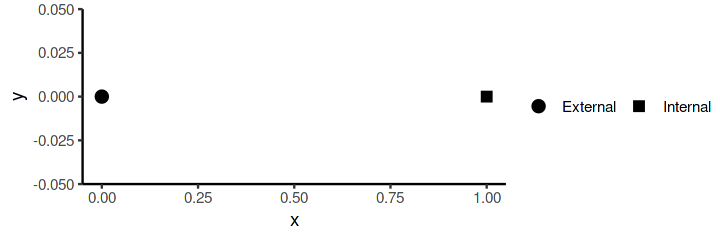

In [19]:
plot_with_legend <- ggplot(data.frame(type=c("External","Internal"), x=c(0,1)), aes(x = x, y = 0, shape = type)) +
  geom_point(size=3) +
  scale_shape_manual(values = c(19, 15)) + labs(shape="") +
  theme_classic() +
  guides(shape = guide_legend(nrow = 1)) +
  theme(legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt")) 
  
legend <- get_legend(plot_with_legend)
plot_with_legend

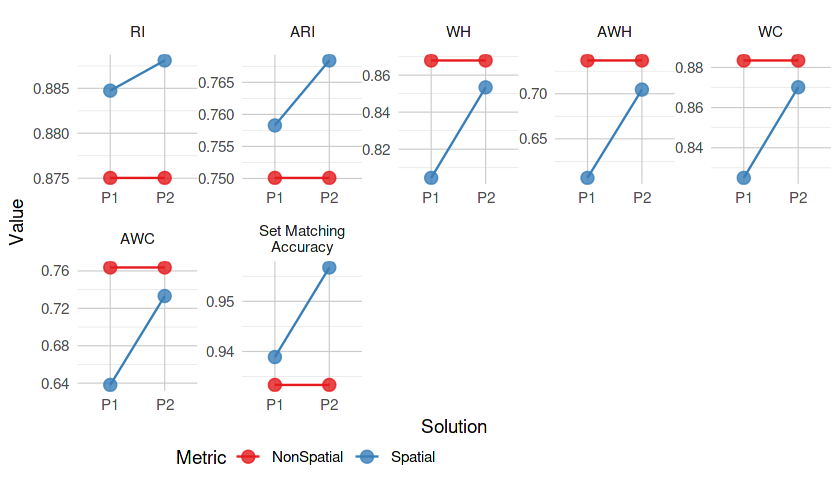

In [20]:
options(repr.plot.width=7, repr.plot.height=4)
pxx <- external %>% 
pivot_longer(cols=c("P1","P2","P3","P4"), names_to = "prediction", values_to = "value") %>%
filter(prediction %in% c("P1","P2")) %>%
ggplot(aes(x=prediction, y=value, color=metric_type)) +
geom_point(size=3, alpha=0.8) +
geom_line(aes(group=metric)) +
facet_wrap(~metric_class, scales = "free", ncol=5) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 3, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.justification = c(0.2, 0), legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="Value", x="Solution", color="Metric")  +
scale_color_brewer(palette = "Set1")
# ylim(0.7, 0.96)
pxx

In [21]:
px <- ggdraw() +
  draw_plot(pxx + theme(plot.margin = margin(0, 2, 2, 2))) +  # Main plot
  draw_plot(legend, x = 0.4, y = -0.18, width = 0.6, height = 0.48)  # Inset plot


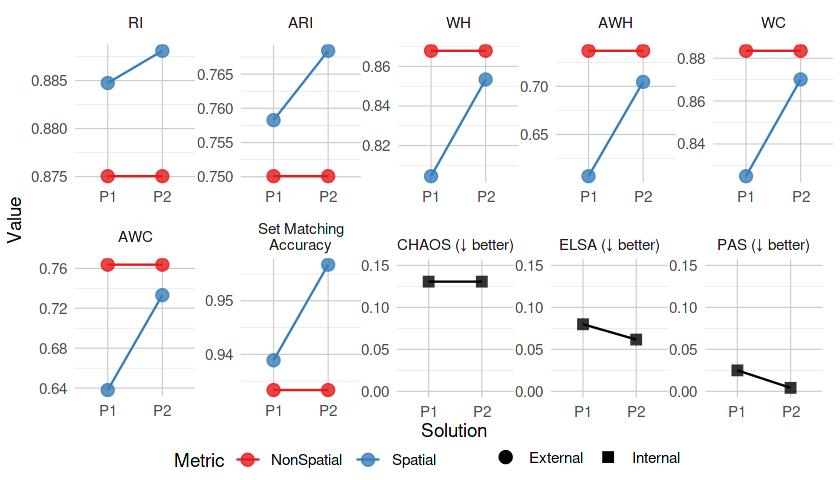

In [22]:
options(repr.plot.width=7, repr.plot.height=4)
p12 <- ggdraw() +
  draw_plot(px + theme(plot.margin = margin(0, 2, 2, 2))) +  # Main plot
  draw_plot(pi, x = 0.39, y = 0.059, width = 0.6, height = 0.48)  # Inset plot

p12

## P3, P4

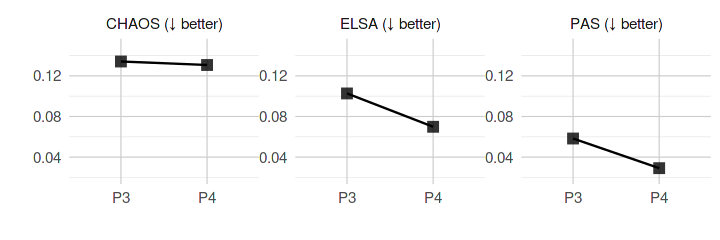

In [23]:
options(repr.plot.width=6, repr.plot.height=2)
pi <- internal %>% 
pivot_longer(cols=c("P1","P2","P3","P4"), names_to = "prediction", values_to = "value") %>%
filter(metric %in% c("PAS", "ELSA", "CHAOS")) %>%
filter(prediction %in% c('P3','P4')) %>%
ggplot(aes(x=prediction, y=value)) +
geom_point(size=3, alpha=0.8, shape=15) +
geom_line(aes(group=metric)) +
facet_wrap(~metric, scales = "free", nrow=1,
            labeller = as_labeller(c("PAS" = "PAS (↓ better)",
                                     "ELSA" = "ELSA (↓ better)",
                                     "CHAOS" = "CHAOS (↓ better)"))) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="", x="") +
ylim(0.02, 0.15)
pi

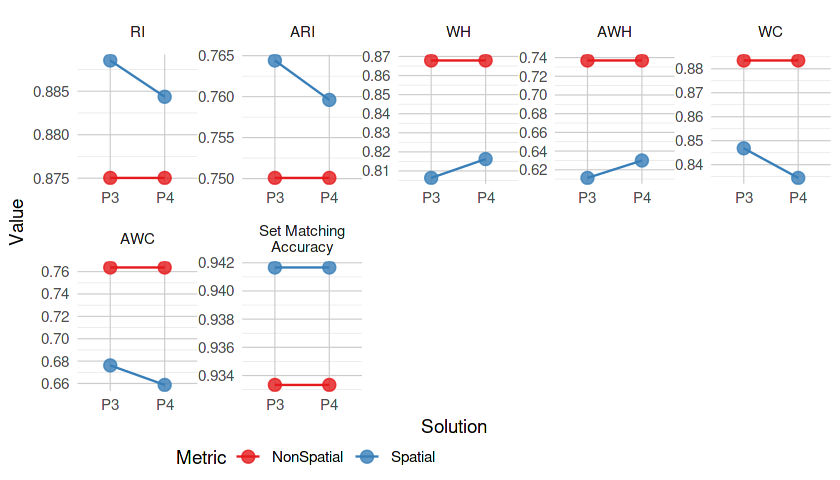

In [24]:
options(repr.plot.width=7, repr.plot.height=4)
pxx <- external %>% 
pivot_longer(cols=c("P1","P2","P3","P4"), names_to = "prediction", values_to = "value") %>%
filter(prediction %in% c("P3","P4")) %>%
ggplot(aes(x=prediction, y=value, color=metric_type)) +
geom_point(size=3, alpha=0.8) +
geom_line(aes(group=metric)) +
facet_wrap(~metric_class, scales = "free", ncol=5) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 3, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.justification = c(0.2, 0), legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="Value", x="Solution", color="Metric") +
scale_color_brewer(palette = "Set1") +
scale_y_continuous(breaks=scales::pretty_breaks())
# ylim(0.7, 0.96)
pxx

In [25]:
px <- ggdraw() +
  draw_plot(pxx + theme(plot.margin = margin(0, 2, 2, 2))) +  # Main plot
  draw_plot(legend, x = 0.4, y = -0.18, width = 0.6, height = 0.48)  # Inset plot


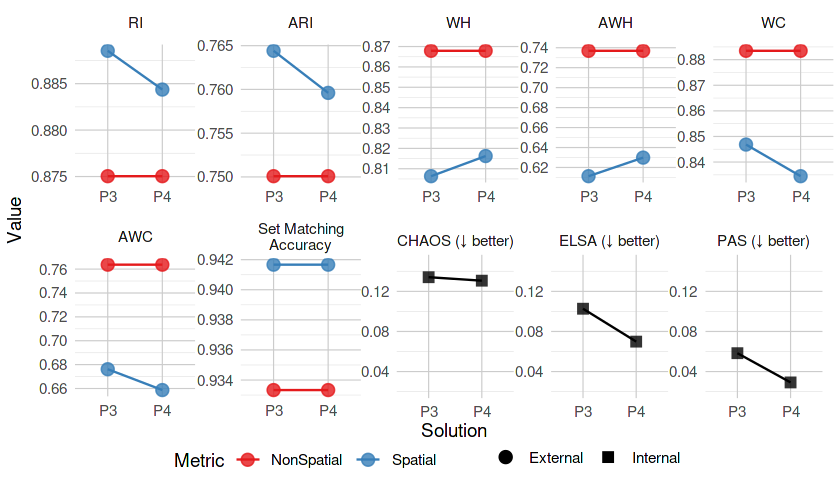

In [26]:
options(repr.plot.width=7, repr.plot.height=4)
p34 <- ggdraw() +
  draw_plot(px + theme(plot.margin = margin(0, 2, 2, 2))) +  # Main plot
  draw_plot(pi, x = 0.39, y = 0.058, width = 0.6, height = 0.49)  # Inset plot

p34

In [27]:
grDevices::cairo_pdf("spatial_toy.pdf", width=7.5, height=12.5)
plot_grid(ps1, 
          p12, 
          ps2,
          p34,
labels = c("a", "b", "c", "d"), 
label_size = 18,
ncol = 1, rel_heights = c(3,4,3,4))
dev.off()


png 
  2

# Class metrics

In [28]:
externalSpatialClass <- do.call(rbind, lapply(setNames(pred, pred_name), function(x){as.data.frame(getSpatialClassExternalMetrics(label, data[[x]], location, k=k, metrics=c("SpatialWH","SpatialAWH", 
                                                     "SpatialWC","SpatialAWC")))}))
externalSpatialClass$prediction <- sapply(strsplit(rownames(externalSpatialClass), "\\."), function(x){x[1]})
externalSpatialClass$class <- sapply(strsplit(rownames(externalSpatialClass), "\\."), function(x){x[2]})
externalSpatialClass
dfl <- externalSpatialClass %>% pivot_longer(cols = c("SpatialWH","SpatialAWH", "SpatialWC","SpatialAWC"), names_to = "metric", values_to = "value")
dfl$metric <- factor(dfl$metric, levels=c("SpatialWH","SpatialAWH", "SpatialWC","SpatialAWC"))

Standard error of the mean NDC across permutations:0.000863

Standard error of the mean NDC across permutations:0.00118

Standard error of the mean NDC across permutations:0.000796

Standard error of the mean NDC across permutations:0.00123



,SpatialWH,SpatialAWH,SpatialWC,SpatialAWC,prediction,class
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
P1.1,0.9092693,0.8176759,0.7254893,0.4334056,P1,1
P1.2,0.7446191,0.4867685,0.9218223,0.8384331,P1,2
P2.1,0.9727641,0.9452004,0.7605683,0.5082622,P2,1
P2.2,0.7858758,0.5699039,0.9767923,0.9524960,P2,2
P3.1,0.9169731,0.8331013,0.7621043,0.4952881,P3,1
P3.2,0.7445779,0.4855995,0.9293102,0.8503300,P3,2
P4.1,0.9235262,0.8465018,0.7318768,0.4492556,P4,1
P4.2,0.7549553,0.5078504,0.9343525,0.8648886,P4,2


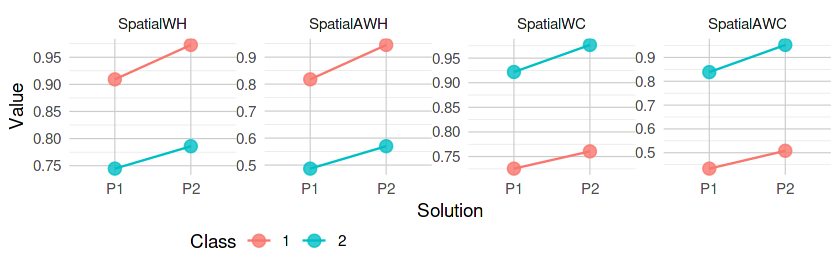

In [29]:
options(repr.plot.width=7, repr.plot.height=2.2)
pclass1 <- dfl %>% filter(prediction %in% c("P1", "P2")) %>%
ggplot(aes(x=prediction, y=value, color=class)) +
geom_point(size=3, alpha=0.8) +
geom_line(aes(group=class)) +
facet_wrap(~metric, scales = "free", ncol=5) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 3, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.justification = c(0.2, 0), legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="Value", x="Solution", color="Class") +
# scale_color_brewer(palette = "Set1") +
scale_y_continuous(breaks=scales::pretty_breaks())
# ylim(0.7, 0.96)
pclass1

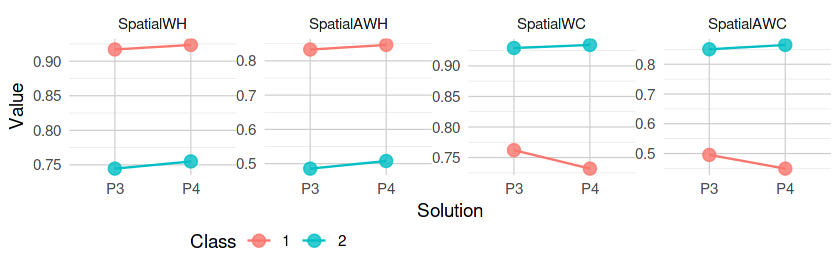

In [30]:
options(repr.plot.width=7, repr.plot.height=2.2)
pclass2 <- dfl %>% filter(prediction %in% c("P3", "P4")) %>%
ggplot(aes(x=prediction, y=value, color=class)) +
geom_point(size=3, alpha=0.8) +
geom_line(aes(group=class)) +
facet_wrap(~metric, scales = "free", ncol=5) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 3, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.justification = c(0.2, 0), legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="Value", x="Solution", color="Class") +
# scale_color_brewer(palette = "Set1") +
scale_y_continuous(breaks=scales::pretty_breaks())
# ylim(0.7, 0.96)
pclass2


# P5, P6

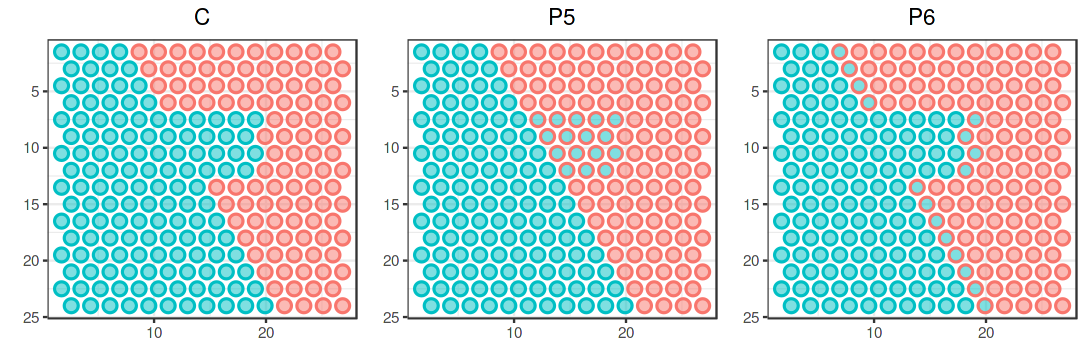

In [31]:
s <- 3
st <- 1

data$c2 <- data$p1
data$p5 <- data$label


data$p6 <- data$p1
data[data$row == 4 & (data$col %in% c(20)), "p6"] <- factor(1, levels=c(1,2))
data[data$row == 5 & (data$col %in% c(19)), "p6"] <- factor(1, levels=c(1,2))
data[data$row == 6 & (data$col %in% c(20)), "p6"] <- factor(1, levels=c(1,2))
data[data$row == 7 & (data$col %in% c(19)), "p6"] <- factor(1, levels=c(1,2))

for (i in unique(data$row)) {
  if(i !=4 & i!=5 & i!=6 & i!=7){
    data[data$row==i & data$col==i+6, "p6"] <- factor(1, levels=c(1,2))
  }
} 

pc <- ggplot(data, aes(x, y, 
               color=c2)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=c2)) + 
  labs(x="",y="", title="C") 


p5 <- ggplot(data, aes(x, y, 
               color=c2)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=p5)) + 
  labs(x="",y="", title="P5") 


p6 <- ggplot(data, aes(x, y, 
               color=c2)) + 
  geom_point(size=s, alpha=0.5) + scale_y_reverse() + theme_bw() +
  geom_point(shape = 1, size = s, stroke = st, aes(color=p6)) + 
  labs(x="",y="", title="P6") 

options(repr.plot.width=9, repr.plot.height=3)
# grDevices::cairo_pdf("Fig1.pdf", width=10, height=3)
ps3 <- plot_grid(pc + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)),
                 p5 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)), 
                p6 + theme(legend.position = "none",plot.title = element_text(hjust = 0.5), plot.margin = margin(5, 2, -2, 0)), 
                # p3 + theme(legend.position = "none"), 
                # p4 + theme(legend.position = "none"), 
                # labels = c("C", "P1", "P2"), 
                ncol = 3)
plot(ps3)
# dev.off()


In [32]:
k <- 6
pred <- c("p5","p6")
pred_name <- c("P5","P6")
label <- data$c2
location <- data[, c('x','y')]
internal <-as.data.frame(lapply(setNames(pred, pred_name), function(x){getSpatialGlobalInternalMetrics(data[[x]], location, k=k, metrics=c("PAS", "ELSA", "CHAOS","MPC", "PC", "PE"))}))
externalSpatial <- as.data.frame(lapply(setNames(pred, pred_name), function(x){getSpatialGlobalExternalMetrics(label, data[[x]], location, k=k, 
                                                                                                                                                metrics=c("SpatialRI","SpatialARI","SpatialWH","SpatialAWH", 
                                                                                                                                                "SpatialWC","SpatialAWC","SpatialAccuracy","setMatchingAccuracy"))}))
externalNormal <- as.data.frame(lapply(setNames(pred, pred_name), function(x){getPartitionMetrics(label, data[[x]], metrics=c("RI","WC","WH","ARI","AWC","AWH"))}))

Standard error of the mean NDC across permutations:0.00102

Standard error of the mean NDC across permutations:0.00103



In [33]:
internal$metric <- factor(rownames(internal))

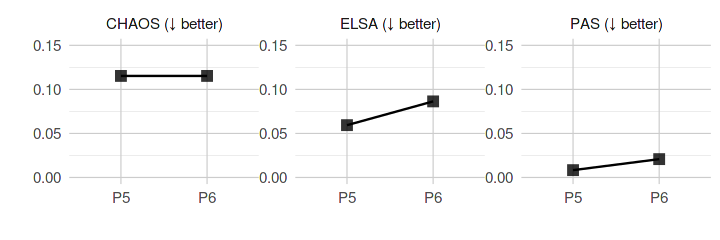

In [34]:
options(repr.plot.width=6, repr.plot.height=2)
pi <- internal %>% 
pivot_longer(cols=c("P5","P6"), names_to = "prediction", values_to = "value") %>%
filter(metric %in% c("PAS", "ELSA", "CHAOS")) %>%
filter(prediction %in% c('P5','P6')) %>%
ggplot(aes(x=prediction, y=value)) +
geom_point(size=3, alpha=0.8, shape=15) +
geom_line(aes(group=metric)) +
facet_wrap(~metric, scales = "free", nrow=1,
            labeller = as_labeller(c("PAS" = "PAS (↓ better)",
                                     "ELSA" = "ELSA (↓ better)",
                                     "CHAOS" = "CHAOS (↓ better)"))) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="", x="") +
ylim(0, 0.15)
pi

In [35]:
external <- rbind(externalSpatial, externalNormal)
external$metric <- rownames(external)
external$metric_class <- sub("Spatial", "", external$metric)
external$metric_type <- ifelse(grepl("Spatial",external$metric) , "Spatial", "NonSpatial")
external["SpatialAccuracy", "metric_class"] <- "Set Matching\nAccuracy"
external["setMatchingAccuracy", "metric_class"] <- "Set Matching\nAccuracy"
external$metric_class <- factor(external$metric_class, levels=c('RI','ARI','WH','AWH','WC','AWC','Set Matching\nAccuracy'))

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


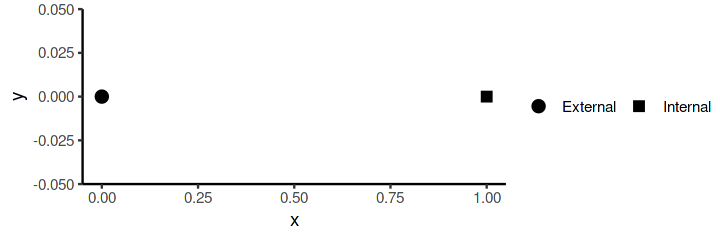

In [36]:
plot_with_legend <- ggplot(data.frame(type=c("External","Internal"), x=c(0,1)), aes(x = x, y = 0, shape = type)) +
  geom_point(size=3) +
  scale_shape_manual(values = c(19, 15)) + labs(shape="") +
  theme_classic() +
  guides(shape = guide_legend(nrow = 1)) +
  theme(legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt")) 
  
legend <- get_legend(plot_with_legend)
plot_with_legend

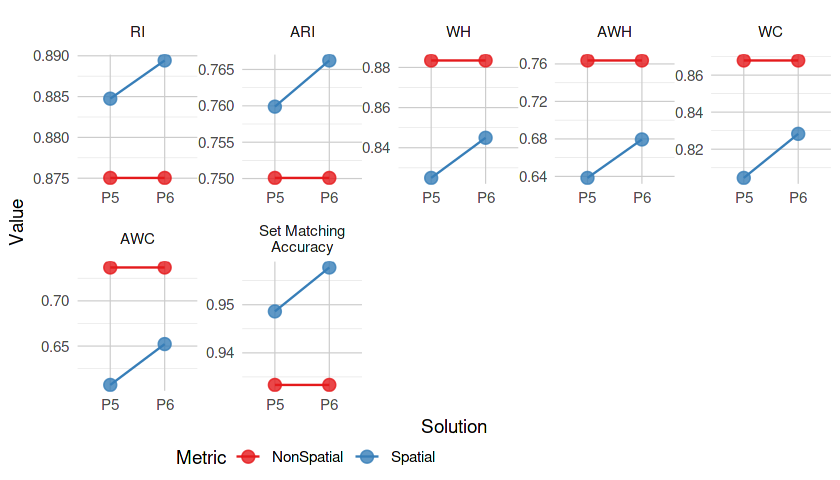

In [37]:
options(repr.plot.width=7, repr.plot.height=4)
pxx <- external %>% 
pivot_longer(cols=c("P5","P6"), names_to = "prediction", values_to = "value") %>%
filter(prediction %in% c("P5","P6")) %>%
ggplot(aes(x=prediction, y=value, color=metric_type)) +
geom_point(size=3, alpha=0.8) +
geom_line(aes(group=metric)) +
facet_wrap(~metric_class, scales = "free", ncol=5) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 3, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", legend.justification = c(0.2, 0), legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="Value", x="Solution", color="Metric")  +
scale_color_brewer(palette = "Set1")
# ylim(0.7, 0.96)
pxx

In [38]:
px <- ggdraw() +
  draw_plot(pxx + theme(plot.margin = margin(0, 2, 2, 2))) +  # Main plot
  draw_plot(legend, x = 0.4, y = -0.18, width = 0.6, height = 0.48)  # Inset plot


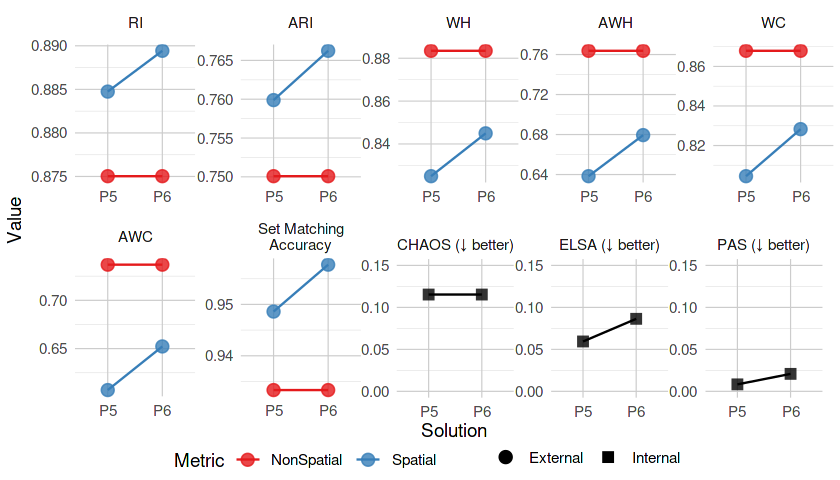

In [39]:
options(repr.plot.width=7, repr.plot.height=4)
p56 <- ggdraw() +
  draw_plot(px + theme(plot.margin = margin(0, 2, 2, 2))) +  # Main plot
  draw_plot(pi, x = 0.39, y = 0.059, width = 0.6, height = 0.48)  # Inset plot

p56

In [40]:
grDevices::cairo_pdf("spatial_toy_s.pdf", width=7.5, height=6)
plot_grid(ps3, 
          p56, 
labels = c("a", "b"), 
label_size = 18,
ncol = 1, rel_heights = c(3,4))
dev.off()


png 
  2

In [41]:
externalSpatialClass <- do.call(rbind, lapply(setNames(pred, pred_name), function(x){as.data.frame(getSpatialClassExternalMetrics(label, data[[x]], location, k=k, metrics=c("SpatialWH","SpatialAWH", 
                                                     "SpatialWC","SpatialAWC")))}))
externalSpatialClass$prediction <- sapply(strsplit(rownames(externalSpatialClass), "\\."), function(x){x[1]})
externalSpatialClass$class <- sapply(strsplit(rownames(externalSpatialClass), "\\."), function(x){x[2]})
externalSpatialClass
dfl <- externalSpatialClass %>% pivot_longer(cols = c("SpatialWH","SpatialAWH", "SpatialWC","SpatialAWC"), names_to = "metric", values_to = "value")
dfl$metric <- factor(dfl$metric, levels=c("SpatialWH","SpatialAWH", "SpatialWC","SpatialAWC"))

Standard error of the mean NDC across permutations:0.00146

Standard error of the mean NDC across permutations:0.00114



,SpatialWH,SpatialAWH,SpatialWC,SpatialAWC,prediction,class
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
P5.1,0.7254893,0.4344037,0.9092693,0.8177457,P5,1
P5.2,0.9218223,0.8379053,0.7446191,0.4856075,P5,2
P6.1,0.7431854,0.4679774,0.9365522,0.8713447,P6,1
P6.2,0.9452895,0.8867404,0.7664295,0.5261511,P6,2


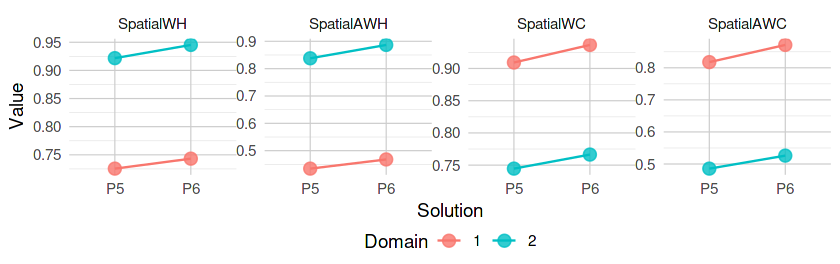

In [49]:
options(repr.plot.width=7, repr.plot.height=2.2)
pclass3 <- dfl %>% filter(prediction %in% c("P5", "P6")) %>%
ggplot(aes(x=prediction, y=value, color=class)) +
geom_point(size=3, alpha=0.8) +
geom_line(aes(group=class)) +
facet_wrap(~metric, scales = "free", ncol=5) +
theme_minimal() +
theme(legend.margin = margin(t = -5, r = 0, b = 3, l = 0, unit = "pt"),
    panel.spacing.x = unit(0, "cm")) +  # Adjust the space between panels) +
theme(legend.position = "bottom", 
    # legend.justification = c(0.2, 0), 
    legend.key.height = unit(0.3, "cm"),
    panel.grid.major = element_line(linewidth = 0.25, color = "grey80"),
    panel.grid.minor = element_line(linewidth = 0.15, color = "grey90")) +
labs(y="Value", x="Solution", color="Domain") +
# scale_color_brewer(palette = "Set1") +
scale_y_continuous(breaks=scales::pretty_breaks())
# ylim(0.7, 0.96)
pclass3

In [50]:
grDevices::cairo_pdf("spatial_toy_s_class.pdf", width=6, height=5)
plot_grid(pclass1 + theme(legend.position = "None"), 
          pclass2 + theme(legend.position = "None"), 
          pclass3,
labels = c("a", "b", "c"), 
label_size = 18,
ncol = 1, rel_heights = c(3,3,3.5))
dev.off()

png 
  2